In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('kaggle-survey-2017/schema.csv')
question.shape

(290, 3)

In [3]:
question.head(7)

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
5,StudentStatus,Are you currently enrolled as a student at a d...,Non-worker
6,LearningDataScience,Are you currently focused on learning data sci...,Non-worker


In [5]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(3)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important


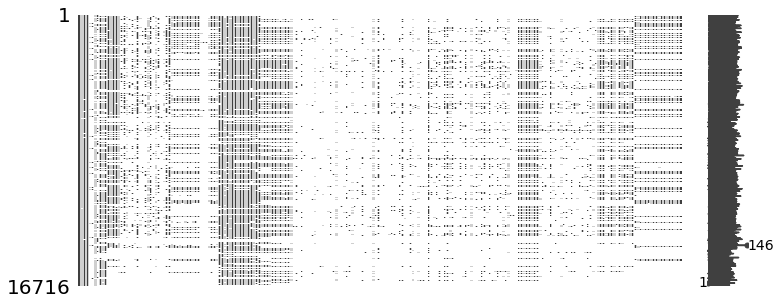

In [8]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

# 설문 통계

## 성별

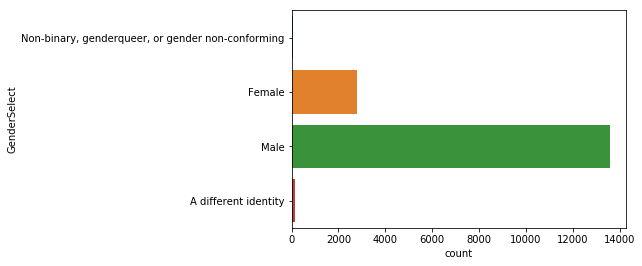

In [11]:
sns.countplot(y="GenderSelect", data=mcq)

In [12]:
# 국가별
# DataFrame에서 .value_counts()는 갯수를 세는 함수
con_df = pd.DataFrame(mcq['Country'].value_counts())

# 컬럼 인덱스를 '국가'로 지정, 컬럼 순으로 칼럼명 지정
con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']

# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [13]:
# 연령에 대한 정보 보기
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

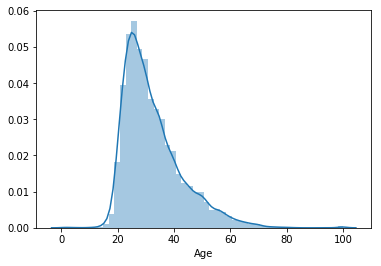

In [14]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

## 학력

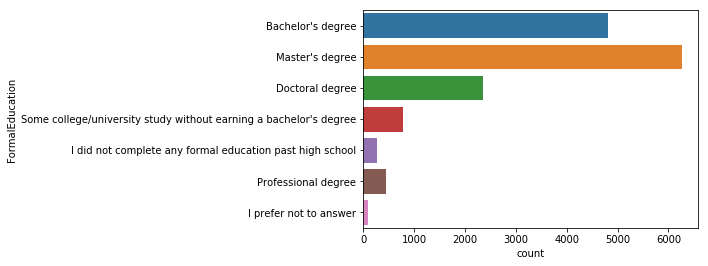

In [15]:
sns.countplot(y='FormalEducation', data=mcq)

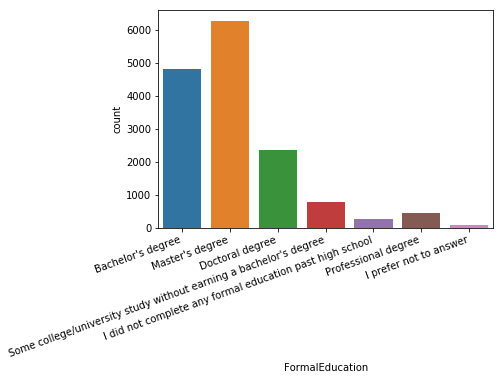

In [17]:
sns.countplot(x='FormalEducation', data=mcq)
plt.xticks(rotation=20, ha='right')
plt.show()

## 전공

In [20]:
# value_counts는 그룹화된 데이터의 count값을 보여준다
# normalize=True 옵션은 해당 데이터가 전체에서 얼마만큼의 비율인지 알 수 있다
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)

mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


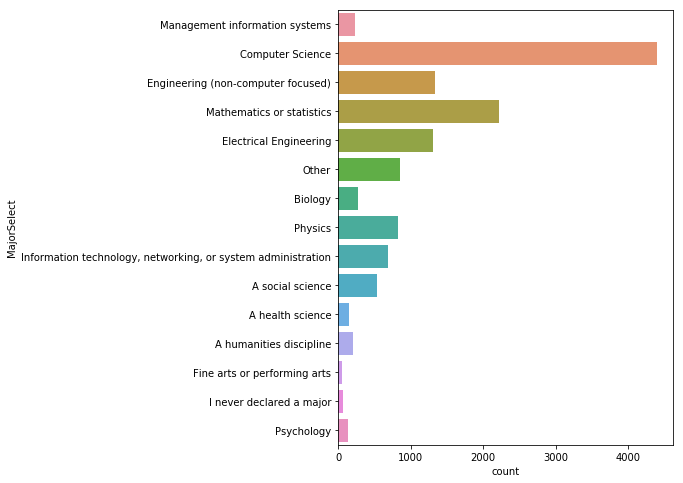

In [21]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업 여부

In [22]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


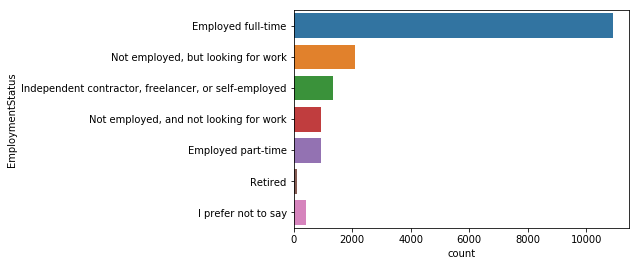

In [26]:
sns.countplot(y='EmploymentStatus', data=mcq)

## 프로그래밍 경험

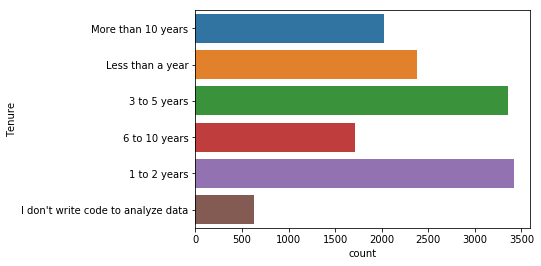

In [27]:
sns.countplot(y='Tenure', data=mcq)

In [33]:
# 한국 사람에 대한 데이터만 가져옴
korea = mcq.loc[(mcq['Country']=='South Korea')]
print('한국인 응답자의 수는 ' + str(korea.shape[0]) + "명")

한국인 응답자의 수는 194명


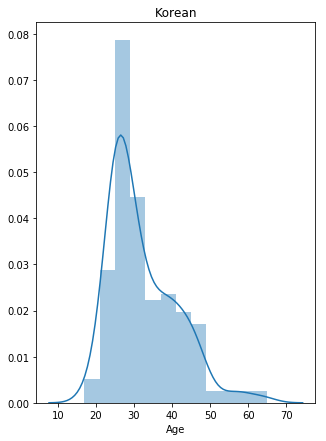

In [36]:
plt.figure(figsize=(5, 7))
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [37]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

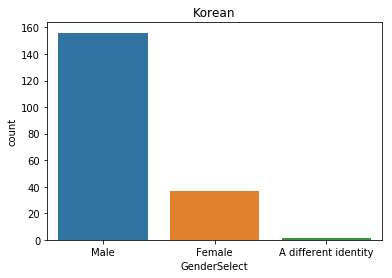

In [38]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

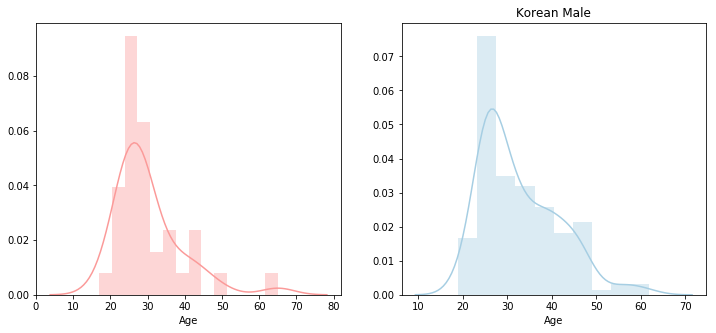

In [40]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12, 5)

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
            norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
plt.title("Korean female")

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
            norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
plt.title("Korean Male")

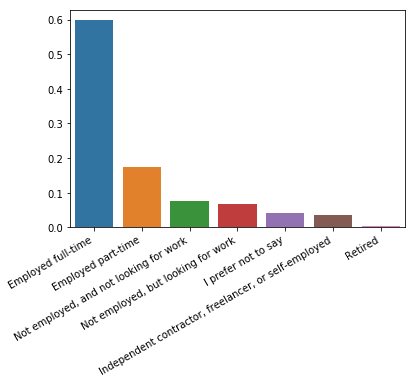

In [41]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.ylabel('')
plt.show()

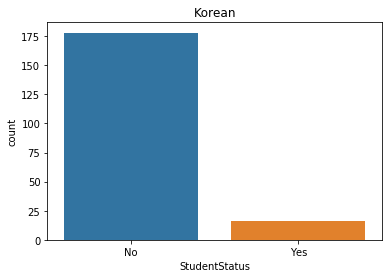

In [42]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Korean')
plt.show()

In [45]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)

(10897, 228)


In [46]:
looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(2110, 228)
